Semester Project

In [1]:
"""

#NOTE!
#Please run the following in terminal before running this

pip3 install -U yellowbrick
"""
from __future__ import print_function
import operator
import matplotlib.pyplot as plt
import sklearn
import re
import seaborn as sns
from sklearn import svm, metrics
from sklearn.svm import SVC



from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import nltk
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

from sklearn.externals import joblib
from sklearn.cluster import KMeans
# Import TfidfVectorizer to create TF-IDF vectors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer


# Import cosine_similarity to calculate similarity of movie plot
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

#https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures



from collections import defaultdict
import math
from random import seed
from random import random

%matplotlib inline
# Import modules necessary to plot dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram

np.random.seed(5)

/home/scott/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/home/scott/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
"""

def tokenize_and_stem(text):

    # Tokenize by sentence, then by word
    tokens = [y for x in nltk.sent_tokenize(text) for y in nltk.word_tokenize(x)]

    # Filter out raw tokens to remove noise
    filtered_tokens = [token for token in tokens if re.search('[a-zA-Z]', token)]

    # Stem the filtered_tokens
    stems = [stemmer.stem(word) for word in filtered_tokens]

    return stems
"""
#stop2 =  ['of ','is ','to ','in ','and ','the ']
cachedStopWords = stopwords.words("english")
#Scott's version
def tokenize_and_stem(text):
    sentence=text
    
    #sentence = sentence.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop2)]))
    #sentence = ' '.join([word for word in text.split() if word not in stop2])
    
    sentence=re.sub('[^a-zA-Z]', ' ', sentence)
    sentence=sentence.lower()  #Make all words lowercase
    sentence=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",sentence)   #remove tags
    sentence=re.sub("(\\d|\\W)+"," ",sentence) # remove special characters and digits
    #tokens = [y for x in nltk.sent_tokenize(sentence) for y in nltk.word_tokenize(x)]
    
   # for i in stop2 :
     #   sentence=re.sub(i, '', sentence)
        
    templist= sentence.split()

    
    # Filter out raw tokens to remove noise
    templist = [token for token in templist if re.search('[a-zA-Z]', token)]
    #stems = [stemmer.stem(word) for word in filtered_tokens]
    lem = WordNetLemmatizer()#Lemmatisation
    templist = [lem.lemmatize(word) for word in templist if not word in  
                stop_words]
    
    stems = [stemmer.stem(word) for word in templist]  
   # test['tweet_without_stopwords'] = test['tweet'].apply(lambda x: ' '.join(
        #            [word for word in x.split() if word not in (stop)]))

    return stems

"""
#http://brandonrose.org/clustering
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

"""


# Instantiate TfidfVectorizer object with stopwords and tokenizer
# parameters for efficient processing of text
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=20000,
                                 min_df=0.12, stop_words='english',tokenizer=tokenize_and_stem,
                                 use_idf=True,
                                 ngram_range=(1,3))
tfidf_vectorizer0 = TfidfVectorizer(max_df=0.8, max_features=20000,min_df=0.12, stop_words='english',tokenizer=tokenize_and_stem, use_idf=True,ngram_range=(1,3))
tfidf_vectorizer1 = TfidfVectorizer(max_df=0.8, max_features=20000,min_df=0.12, stop_words='english',tokenizer=tokenize_and_stem, use_idf=True,ngram_range=(1,3))
tfidf_vectorizer2 = TfidfVectorizer(max_df=0.8, max_features=20000,min_df=0.12, stop_words='english', tokenizer=tokenize_and_stem,use_idf=True,ngram_range=(1,3))
tfidf_vectorizer3 = TfidfVectorizer(max_df=0.8, max_features=20000,min_df=0.12, stop_words='english',tokenizer=tokenize_and_stem, use_idf=True,ngram_range=(1,3))
tfidf_vectorizer4 = TfidfVectorizer(max_df=0.8, max_features=20000,min_df=0.12, stop_words='english',tokenizer=tokenize_and_stem, use_idf=True,ngram_range=(1,3))
tfidf_vectorizer5 = TfidfVectorizer(max_df=0.8, max_features=20000,min_df=0.12, stop_words='english',tokenizer=tokenize_and_stem, use_idf=True,ngram_range=(1,3))
tfidf_vectorizer6 = TfidfVectorizer(max_df=0.8, max_features=20000,min_df=0.12, stop_words='english',tokenizer=tokenize_and_stem, use_idf=True,ngram_range=(1,3))



tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer0=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer1=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer2=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer3=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer4=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer5=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer6=TfidfTransformer(smooth_idf=True,use_idf=True)


tfidf_vectorizer_overview = TfidfVectorizer(max_df=0.8, max_features=20000,
                                 min_df=0.1, stop_words='english',
                                 use_idf=True,tokenizer=tokenize_and_stem,
                                 ngram_range=(1,3))



words_stemmed = tokenize_and_stem("Today (May 19, 2016) of to in is his only daughter's wedding.")
print(words_stemmed)

#, tokenizer=tokenize_and_stem
#original max features=200000
# tokenizer=tokenize_and_stem,





def elbow_analysis(self, k_range):
        '''
        PARAMS:
            k_range : (list of integers) contains the K number of
            hyperparameters k to peform the analysis over
        RETURN:
            avg_variance : (list of float) list of size K. contains the average variance 
            of clusters corresponding to each to each hyperparameter k
        '''
        a,b = self.X.shape
        avg_variance=[]
        for k in k_range:
                #print("k=",k)
                self.K=k
                self.centroids=self.initialize_centroids()
                
                self.cluster(20,False)
                
                mindist=sum(np.min(self.compute_distances(),axis=1))
                #print("mindist=",mindist)
                #print("a=",a)
                avgmindist=mindist/a
                avg_variance.append(avgmindist)
                #print(avg_variance)
        
        return avg_variance

['today', 'may', 'daughter', 'wed']


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3647 entries, 0 to 3683
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3647 non-null   int64  
 1   year                   3647 non-null   int64  
 2   title                  3647 non-null   object 
 3   genres                 3647 non-null   object 
 4   original_language      3647 non-null   object 
 5   productions_companies  3485 non-null   object 
 6   overview               3647 non-null   object 
 7   tagline                3252 non-null   object 
 8   budget                 3647 non-null   float64
 9   revenue                3647 non-null   float64
 10  profit                 3647 non-null   float64
 11  overview2              3647 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 370.4+ KB
None


/home/scott/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'le', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'u', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


idf_weights for all film genres
             idf_weights
drama           1.774196
comedy          2.018064
thriller        2.275357
action          2.372141
adventure       2.714250
romance         2.742030
crime           2.912219
horror          3.090467
family          3.168848
fiction         3.171249
science         3.171249
fantasy         3.280356
mystery         3.443033
animation       3.750896
history         4.246107
music           4.422811
war             4.596764
documentary     4.759283
western         5.705427
movie           7.122493
tv              7.122493


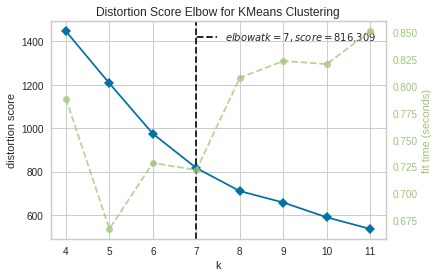

genre_clusters 1    759
2    603
5    590
4    487
3    438
0    436
6    334
Name: genre_cluster, dtype: int64


/home/scott/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'le', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'u', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/home/scott/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent

(436, 13)
(334, 16)
cluster 0
             idf_weights
drama           1.000000
history         2.921050
action          3.090949
war             3.469015
music           3.821837
fiction         4.035411
science         4.035411
family          4.084201
fantasy         4.189561
mystery         4.595027
western         4.882709
documentary     5.470495
animation       5.693639
cluster 1
             idf_weights
adventure       1.243078
action          1.664611
family          2.140257
fiction         2.305442
science         2.305442
comedy          2.325051
fantasy         2.345051
animation       2.545722
drama           2.960490
thriller        3.079442
documentary     3.413811
history         4.375222
music           4.414443
war             4.414443
mystery         4.455265
romance         4.925268
western         4.925268
crime           5.148412
horror          5.553877
movie           6.023881
tv              6.023881
cluster 2
             idf_weights
romance         1.000000


/home/scott/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'le', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'u', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/home/scott/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent

''

In [3]:
"""
https://shravan-kuchkula.github.io/clustering_movie_plots/#2-combine-wikipedia-and-imdb-plot-summaries
"""

#a.drop(indexNames , inplace=True)
"""
indexNames2 = a[ a['country'] != "USA" ].index 
a.drop(indexNames2 , inplace=True)
indexNames3 = a[ a['year'] != 2016 ].index
a.drop(indexNames3 , inplace=True)
print(a.info())
#print(a.groupby("country").mean())  
#print(a['country'].value_counts())
#print(max(a['year']))

"""
TMDB= pd.read_csv("TMDBalldatafrom2019to1999.csv",delimiter='|' ) 
#Movies from 2000 to 2019
#english ONLY
#print(TMDB.info())
TMDB['profit'] = TMDB['revenue'] - TMDB['budget']
#indexNames3 = TMDB[TMDB['year'] != 2016 ].index
#TMDB.drop(indexNames3 , inplace=True)



TMDB.dropna(subset = ["overview"], inplace=True)
TMDB.dropna(subset = ["genres"], inplace=True)

#https://stackoverflow.com/questions/5511708/adding-words-to-nltk-stoplist
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['the','life','lives','one','young','when','them','they']
stopwords.extend(newStopWords)


TMDB['overview2'] = TMDB['overview'].apply(
        lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
print(TMDB.info())
#print(TMDB.info())
#pd.options.display.max_rows = 4000
#print(TMDB['genres'].value_counts())

#TMDB.head()  #displays first rows of data nicely

#https://stackoverflow.com/questions/34449127/sklearn-tfidf-transformer-how-to-get-tf-idf-values-of-given-words-in-documen
#terms = tfidf_vectorizer.get_feature_names()
#df = pd.DataFrame(tfidf_matrix.toarray(), columns = tfidf_vectorizer.get_feature_names())
#print(df)

tfidf_matrix =  tfidf_vectorizer.fit_transform([x for x in TMDB["genres"]])


#https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/
#instantiate CountVectorizer()
cv=CountVectorizer()
 
# this steps generates word counts for the words in your docs
word_count_vector=cv.fit_transform([x for x in TMDB["genres"]])
tfidf_valuelist= tfidf_transformer.fit(word_count_vector)

# print idf values
df_idf = pd.DataFrame(tfidf_valuelist.idf_, index=cv.get_feature_names(),columns=["idf_weights"])


print("idf_weights for all film genres")
print(df_idf.sort_values(by=['idf_weights']))# sort ascending


#print(tfidf_matrix.shape)
#print(tfidf_matrix)



model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(tfidf_matrix)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

GenreClustertotal=7
km = KMeans(n_clusters=GenreClustertotal)
# Fit the k-means object with tfidf_matrix
km.fit(tfidf_matrix)
clusters = km.labels_.tolist()
# Create a column cluster to denote the generated cluster for each movie
TMDB["genre_cluster"] = clusters

# Display number of films per cluster (clusters from 0 to 4)
print("genre_clusters",TMDB['genre_cluster'].value_counts())
#--------------------------------------------


TMDBgenrecluster0=TMDB[TMDB['genre_cluster'] == 0]
TMDBgenrecluster1=TMDB[TMDB['genre_cluster'] == 1]
TMDBgenrecluster2=TMDB[TMDB['genre_cluster'] == 2]
TMDBgenrecluster3=TMDB[TMDB['genre_cluster'] == 3]
TMDBgenrecluster4=TMDB[TMDB['genre_cluster'] == 4]
TMDBgenrecluster5=TMDB[TMDB['genre_cluster'] == 5]
TMDBgenrecluster6=TMDB[TMDB['genre_cluster'] == 6]

tfidf_matrix0 =  tfidf_vectorizer0.fit_transform([x for x in TMDBgenrecluster0["genres"]])

tfidf_matrix1 =  tfidf_vectorizer1.fit_transform([x for x in TMDBgenrecluster1["genres"]])
tfidf_matrix2 =  tfidf_vectorizer2.fit_transform([x for x in TMDBgenrecluster2["genres"]])
tfidf_matrix3 =  tfidf_vectorizer3.fit_transform([x for x in TMDBgenrecluster3["genres"]])
tfidf_matrix4 =  tfidf_vectorizer4.fit_transform([x for x in TMDBgenrecluster4["genres"]])
tfidf_matrix5 =  tfidf_vectorizer5.fit_transform([x for x in TMDBgenrecluster5["genres"]])
tfidf_matrix6 =  tfidf_vectorizer6.fit_transform([x for x in TMDBgenrecluster6["genres"]])

cv0=CountVectorizer()
cv1=CountVectorizer()
cv2=CountVectorizer()
cv3=CountVectorizer()
cv4=CountVectorizer()
cv5=CountVectorizer()
cv6=CountVectorizer()

word_count_vector0=cv0.fit_transform([a for a in TMDBgenrecluster0["genres"]])
print(word_count_vector0.shape)
word_count_vector1=cv1.fit_transform([b for b in TMDBgenrecluster1["genres"]])
word_count_vector2=cv2.fit_transform([c for c in TMDBgenrecluster2["genres"]])
word_count_vector3=cv3.fit_transform([d for d in TMDBgenrecluster3["genres"]])
word_count_vector4=cv4.fit_transform([e for e in TMDBgenrecluster4["genres"]])
word_count_vector5=cv5.fit_transform([f for f in TMDBgenrecluster5["genres"]])
word_count_vector6=cv6.fit_transform([g for g in TMDBgenrecluster6["genres"]])
print(word_count_vector6.shape)

tfidf_valuelist0= tfidf_transformer0.fit(word_count_vector0)
tfidf_valuelist1= tfidf_transformer1.fit(word_count_vector1)
tfidf_valuelist2= tfidf_transformer2.fit(word_count_vector2)
tfidf_valuelist3= tfidf_transformer3.fit(word_count_vector3)
tfidf_valuelist4= tfidf_transformer4.fit(word_count_vector4)
tfidf_valuelist5= tfidf_transformer5.fit(word_count_vector5)
tfidf_valuelist6= tfidf_transformer6.fit(word_count_vector6)


df_idf0 = pd.DataFrame(tfidf_valuelist0.idf_, index=cv0.get_feature_names(),columns=["idf_weights"])
df_idf1 = pd.DataFrame(tfidf_valuelist1.idf_, index=cv1.get_feature_names(),columns=["idf_weights"])
df_idf2 = pd.DataFrame(tfidf_valuelist2.idf_, index=cv2.get_feature_names(),columns=["idf_weights"])
df_idf3 = pd.DataFrame(tfidf_valuelist3.idf_, index=cv3.get_feature_names(),columns=["idf_weights"])
df_idf4 = pd.DataFrame(tfidf_valuelist4.idf_, index=cv4.get_feature_names(),columns=["idf_weights"])
df_idf5 = pd.DataFrame(tfidf_valuelist5.idf_, index=cv5.get_feature_names(),columns=["idf_weights"])
df_idf6 = pd.DataFrame(tfidf_valuelist6.idf_, index=cv6.get_feature_names(),columns=["idf_weights"])


print("cluster 0")
print(df_idf0.sort_values(by=['idf_weights']))
print("cluster 1")
print(df_idf1.sort_values(by=['idf_weights']))
print("cluster 2")
print(df_idf2.sort_values(by=['idf_weights']))
print("cluster 3")
print(df_idf3.sort_values(by=['idf_weights']))
print("cluster 4")
print(df_idf4.sort_values(by=['idf_weights']))
print("cluster 5")
print(df_idf5.sort_values(by=['idf_weights']))
print("cluster 6")
print(df_idf6.sort_values(by=['idf_weights']))
"""





# Calculate the similarity distance
similarity_distance = 1 - cosine_similarity(tfidf_matrix)


# Create mergings matrix
mergings = linkage(similarity_distance, method='complete')

# Plot the dendrogram, using title as label column
dendrogram_ = dendrogram(mergings, orientation="left",
               labels=[x for x in TMDB["title"]],
               #leaf_rotation=90,
               leaf_font_size=27)

# Adjust the plot
fig = plt.gcf()
_ = [lbl.set_color('r') for lbl in plt.gca().get_xmajorticklabels()]
fig.set_size_inches(80, 80)

# Show the plotted dendrogram
#plt.savefig('plt.png', format='png', bbox_inches='tight')
plt.show()
#print(TMDB)

"""    

#TMDB.head()
""""""

In [5]:
#subclusterCount0=0
subclustertotal=7
for a in range(subclustertotal):
    #print("-----------A=", a)
    indexMain=TMDB[TMDB['genre_cluster'] == a ].index
#TMDB.drop(indexNames3 , inplace=True)  
    if a==0:
        TMDBcluster0=TMDB[TMDB['genre_cluster'] == a ]
        tfidf_matrix_overview =  tfidf_vectorizer_overview.fit_transform(
                         [x for x in TMDBcluster0["overview2"]]) 
        
        km_overview = KMeans(n_clusters=subclustertotal)
        # Fit the k-means object with tfidf_matrix
        km_overview.fit(tfidf_matrix_overview)
        clusters_overview = km_overview.labels_.tolist()
        # Create a column cluster to denote the generated cluster for each movie
        TMDBcluster0["overview_cluster"] = clusters_overview
        subclusterCount0=TMDBcluster0["overview_cluster"].max()
        print("subclusterCount0=",subclusterCount0)
        
        TMDBcluster0["generalcluster"]=clusters_overview
        # Display number of films per cluster (clusters from 0 to 4)
        #print("overview_cluster",TMDBcluster0['overview_cluster'].value_counts())
        #print("generalcluster",TMDBcluster0['generalcluster'].value_counts())
        #print(TMDBcluster0)
        
        
    subclustertotal=7
    if a==1:
        TMDBcluster1=TMDB[TMDB['genre_cluster'] == a ]
        tfidf_matrix_overview =  tfidf_vectorizer_overview.fit_transform(
                         [x for x in TMDBcluster1["overview2"]]) 
        km_overview = KMeans(n_clusters=subclustertotal)
        km_overview.fit(tfidf_matrix_overview)
        clusters_overview = km_overview.labels_.tolist()
        TMDBcluster1["overview_cluster"] = clusters_overview
        subclusterCount1=TMDBcluster1["overview_cluster"].max()
        print("subclusterCount1=",subclusterCount1)
        TMDBcluster1["generalcluster"]=clusters_overview
        TMDBcluster1["generalcluster"]+=1+subclusterCount0
        #print("overview_cluster",TMDBcluster1['overview_cluster'].value_counts())
        #print("generalcluster",TMDBcluster1['generalcluster'].value_counts())
    if a==2:
        TMDBcluster2=TMDB[TMDB['genre_cluster'] == a ]
        tfidf_matrix_overview =  tfidf_vectorizer_overview.fit_transform(
                         [x for x in TMDBcluster2["overview2"]]) 
        km_overview = KMeans(n_clusters=subclustertotal)
        km_overview.fit(tfidf_matrix_overview)
        clusters_overview = km_overview.labels_.tolist()
        TMDBcluster2["overview_cluster"] = clusters_overview
        subclusterCount2=TMDBcluster2["overview_cluster"].max()
        print("subclusterCount2=",subclusterCount2)        
        TMDBcluster2["generalcluster"]=clusters_overview
        TMDBcluster2["generalcluster"]+=2+subclusterCount0+subclusterCount1
        #print("overview_cluster",TMDBcluster2['overview_cluster'].value_counts())
        #print("generalcluster",TMDBcluster2['generalcluster'].value_counts())
    if a==3:
        TMDBcluster3=TMDB[TMDB['genre_cluster'] == a ]
        tfidf_matrix_overview =  tfidf_vectorizer_overview.fit_transform(
                         [x for x in TMDBcluster3["overview2"]]) 
        km_overview = KMeans(n_clusters=subclustertotal)
        km_overview.fit(tfidf_matrix_overview)
        clusters_overview = km_overview.labels_.tolist()
        TMDBcluster3["overview_cluster"] = clusters_overview
        subclusterCount3=TMDBcluster3["overview_cluster"].max()
        print("subclusterCount3=",subclusterCount3)
        #TMDBcluster3["generalcluster"]=(clusters_overview+1+
         #  subclusterCount0+subclusterCount1+subclusterCount2)
        TMDBcluster3["generalcluster"]=clusters_overview
        TMDBcluster3["generalcluster"]+=3+subclusterCount0+subclusterCount1+subclusterCount2
        #print("overview_cluster",TMDBcluster3['overview_cluster'].value_counts())
        #print("generalcluster",TMDBcluster3['generalcluster'].value_counts())
    if a==4:
        TMDBcluster4=TMDB[TMDB['genre_cluster'] == a ]
        tfidf_matrix_overview =  tfidf_vectorizer_overview.fit_transform(
                         [x for x in TMDBcluster4["overview2"]]) 
        km_overview = KMeans(n_clusters=subclustertotal)
        km_overview.fit(tfidf_matrix_overview)
        clusters_overview = km_overview.labels_.tolist()
        TMDBcluster4["overview_cluster"] = clusters_overview
        subclusterCount4=TMDBcluster4["overview_cluster"].max()
        print("subclusterCount4=",subclusterCount4)
        TMDBcluster4["generalcluster"]=clusters_overview
        TMDBcluster4["generalcluster"]+=(4+subclusterCount0+subclusterCount1+subclusterCount2
                                            +subclusterCount3)
        
        #print("overview_cluster",TMDBcluster4['overview_cluster'].value_counts())
        #print("generalcluster",TMDBcluster4['generalcluster'].value_counts())
    if a==5:
        TMDBcluster5=TMDB[TMDB['genre_cluster'] == a ]
        tfidf_matrix_overview =  tfidf_vectorizer_overview.fit_transform(
                         [x for x in TMDBcluster5["overview2"]]) 
        km_overview = KMeans(n_clusters=subclustertotal)
        km_overview.fit(tfidf_matrix_overview)
        clusters_overview = km_overview.labels_.tolist()
        TMDBcluster5["overview_cluster"] = clusters_overview
        subclusterCount5=TMDBcluster5["overview_cluster"].max()
        print("subclusterCount5=",subclusterCount5)
        #print("modifier= ",(5+subclusterCount0+subclusterCount1+subclusterCount2
                           #                 +subclusterCount3+subclusterCount4))
        TMDBcluster5["generalcluster"]=clusters_overview
        TMDBcluster5["generalcluster"]+=(5+subclusterCount0+subclusterCount1+subclusterCount2
                                            +subclusterCount3+subclusterCount4)
        
        #print("overview_cluster",TMDBcluster5['overview_cluster'].value_counts())
        #print("generalcluster",TMDBcluster5['generalcluster'].value_counts())
    if a==6:
        TMDBcluster6=TMDB[TMDB['genre_cluster'] == a ]
        tfidf_matrix_overview =  tfidf_vectorizer_overview.fit_transform(
                         [x for x in TMDBcluster6["overview2"]]) 
        km_overview = KMeans(n_clusters=subclustertotal)
        km_overview.fit(tfidf_matrix_overview)
        clusters_overview = km_overview.labels_.tolist()
        TMDBcluster6["overview_cluster"] = clusters_overview
        subclusterCount6=TMDBcluster6["overview_cluster"].max()
        print("subclusterCount6=",subclusterCount6)
        TMDBcluster6["generalcluster"]=clusters_overview
        TMDBcluster6["generalcluster"]+=(6+subclusterCount0+subclusterCount1+subclusterCount2
                                            +subclusterCount3+subclusterCount4+subclusterCount5)
        #print("overview_cluster",TMDBcluster6['overview_cluster'].value_counts())
        #print("generalcluster",TMDBcluster6['generalcluster'].value_counts())
    #df = pd.DataFrame(tfidf_matrix_overview.toarray(), columns = tfidf_vectorizer.get_feature_names())
    #print(df) 

TMDB_updated=TMDBcluster0

#print(TMDB_updated.info())
#print(TMDBcluster1.info())
TMDB_updated=TMDB_updated.append(TMDBcluster1)
TMDB_updated=TMDB_updated.append(TMDBcluster2)
TMDB_updated=TMDB_updated.append(TMDBcluster3)
TMDB_updated=TMDB_updated.append(TMDBcluster4)
TMDB_updated=TMDB_updated.append(TMDBcluster5)
TMDB_updated=TMDB_updated.append(TMDBcluster6)

print(TMDB_updated.info())
print(TMDB_updated['generalcluster'].value_counts())

/home/scott/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/scott/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


subclusterCount0= 6


/home/scott/.local/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/scott/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/scott/.local/lib/python3.6/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

subclusterCount1= 6


/home/scott/.local/lib/python3.6/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/scott/.local/lib/python3.6/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/scott/.local/lib/python3.6/site-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

subclusterCount2= 6


/home/scott/.local/lib/python3.6/site-packages/ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/scott/.local/lib/python3.6/site-packages/ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/scott/.local/lib/python3.6/site-packages/ipykernel_launcher.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

subclusterCount3= 6


/home/scott/.local/lib/python3.6/site-packages/ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/scott/.local/lib/python3.6/site-packages/ipykernel_launcher.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/scott/.local/lib/python3.6/site-packages/ipykernel_launcher.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

subclusterCount4= 6


/home/scott/.local/lib/python3.6/site-packages/ipykernel_launcher.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/scott/.local/lib/python3.6/site-packages/ipykernel_launcher.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/scott/.local/lib/python3.6/site-packages/ipykernel_launcher.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

subclusterCount5= 6
subclusterCount6= 6
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3647 entries, 0 to 3676
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3647 non-null   int64  
 1   year                   3647 non-null   int64  
 2   title                  3647 non-null   object 
 3   genres                 3647 non-null   object 
 4   original_language      3647 non-null   object 
 5   productions_companies  3485 non-null   object 
 6   overview               3647 non-null   object 
 7   tagline                3252 non-null   object 
 8   budget                 3647 non-null   float64
 9   revenue                3647 non-null   float64
 10  profit                 3647 non-null   float64
 11  overview2              3647 non-null   object 
 12  genre_cluster          3647 non-null   int64  
 13  overview_cluster       3647 non-null   int64  
 14  generalcluster  

/home/scott/.local/lib/python3.6/site-packages/ipykernel_launcher.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/scott/.local/lib/python3.6/site-packages/ipykernel_launcher.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/scott/.local/lib/python3.6/site-packages/ipykernel_launcher.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [6]:
for j in range(TMDB_updated["generalcluster"].max()+1):
    
    tfidf_vectorizerTEMP = TfidfVectorizer(max_df=0.9, max_features=20000,
                                       min_df=0.05,stop_words='english',
                                           tokenizer=tokenize_and_stem, use_idf=True,ngram_range=(1,3))
    tfidf_transformerTEMP=TfidfTransformer(smooth_idf=True,use_idf=True)

    TMDBgeneralclusterTEMP=TMDB_updated[TMDB_updated['generalcluster'] == j]
    tfidf_matrixTEMP =  tfidf_vectorizerTEMP.fit_transform([x for x in TMDBgeneralclusterTEMP["overview2"]])
    cvTEMP=CountVectorizer()
    word_count_vectorTEMP=cvTEMP.fit_transform([a for a in TMDBgeneralclusterTEMP["overview2"]])


    tfidf_valuelistTEMP= tfidf_transformerTEMP.fit(word_count_vectorTEMP)

    df_idfTEMP = pd.DataFrame(tfidf_valuelistTEMP.idf_, index=cvTEMP.get_feature_names(),columns=[
        "idf_weights"])

    print("cluster# ",j)
    print(df_idfTEMP.sort_values(by=['idf_weights']))


/home/scott/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'le', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'u', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/home/scott/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent

cluster#  0
            idf_weights
story          1.041673
the            1.524524
true           2.326871
man            2.589235
american       2.812379
...                 ...
flag           4.198673
flair          4.198673
flashbacks     4.198673
food           4.198673
zion           4.198673

[926 rows x 1 columns]
cluster#  1
        idf_weights
the        3.060514
in         3.348196
life       3.348196
he         3.417188
woman      3.417188
...             ...
giving     5.363099
gives      5.363099
given      5.363099
great      5.363099
zoo        5.363099

[2320 rows x 1 columns]
cluster#  2
           idf_weights
new           1.000000
york          2.321756
year          2.504077
family        2.504077
world         2.609438
...                ...
fruitvale     4.113515
fulfill       4.113515
gaines        4.113515
handle        4.113515
zero          4.113515

[1069 rows x 1 columns]
cluster#  3
           idf_weights
family        1.048790
the           2.172720
when 

/home/scott/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'le', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'u', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/home/scott/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent

cluster#  6
              idf_weights
father           1.634307
year             1.723919
old              1.931558
the              2.356441
years            2.356441
...                   ...
friday           4.496508
fraternities     4.496508
francis          4.496508
gangbangers      4.496508
land             4.496508

[1481 rows x 1 columns]
cluster#  7
            idf_weights
powerful       1.895384
powers         2.043804
power          2.127186
the            2.218157
world          2.266948
...                 ...
image          4.569533
illya          4.569533
illuminate     4.569533
hollywood      4.569533
zion           4.569533

[1442 rows x 1 columns]


/home/scott/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'le', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'u', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/home/scott/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent

cluster#  8
             idf_weights
the             2.507159
when            3.022625
must            3.046156
in              3.146239
it              3.487988
...                  ...
magneto         6.090678
magnificent     6.090678
magnitude       6.090678
maestro         6.090678
zubair          6.090678

[4312 rows x 1 columns]
cluster#  9
          idf_weights
world        1.063179
the          2.366092
when         2.493925
must         2.589235
find         2.694596
...               ...
frank        4.891820
framed       4.891820
fraction     4.891820
fulfill      4.891820
æon          4.891820

[1907 rows x 1 columns]


/home/scott/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'le', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'u', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/home/scott/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent

cluster#  10
             idf_weights
year            1.552069
years           1.578737
old             2.054161
the             2.356441
world           2.624705
...                  ...
french          4.496508
freight         4.496508
freedom         4.496508
fredricksen     4.496508
zorro           4.496508

[1665 rows x 1 columns]
cluster#  11
          idf_weights
new          1.000000
world        2.203973
the          2.386294
must         2.609438
york         2.609438
...               ...
gang         4.401197
galaxy       4.401197
furthest     4.401197
fucker       4.401197
zoo          4.401197

[1350 rows x 1 columns]


/home/scott/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'le', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'u', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/home/scott/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent

cluster#  12
          idf_weights
forces       1.707746
forced       2.289668
world        2.289668
the          2.400893
force        2.400893
...               ...
gandalf      4.540959
games        4.540959
game         4.540959
general      4.540959
zootopia     4.540959

[1545 rows x 1 columns]
cluster#  13
         idf_weights
friends     1.559616
friend      1.878070
the         2.165752
new         2.399366
must        2.510592
...              ...
galaxy      4.650658
ga          4.650658
fury        4.650658
geeky       4.650658
zoo         4.650658

[1744 rows x 1 columns]


/home/scott/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'le', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'u', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/home/scott/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent

cluster#  14
            idf_weights
new            1.000000
york           1.711496
love           2.368276
but            2.609438
life           2.704748
...                 ...
five           4.314186
flash          4.314186
flashbacks     4.314186
expert         4.314186
zetas          4.314186

[1102 rows x 1 columns]
cluster#  15
             idf_weights
when            2.815290
the             2.904902
life            3.074801
two             3.074801
friends         3.112541
...                  ...
girlfriends     5.677491
gives           5.677491
giving          5.677491
glamorous       5.677491
zoe             5.677491

[2932 rows x 1 columns]


/home/scott/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'le', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'u', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/home/scott/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent

cluster#  16
         idf_weights
years       1.578737
year        1.693147
old         1.970779
love        2.245216
new         2.550597
...              ...
girard      4.496508
gifted      4.496508
getting     4.496508
giving      4.496508
youths      4.496508

[1303 rows x 1 columns]
cluster#  17
           idf_weights
man           1.170958
falls         2.304056
love          2.540445
woman         2.609438
life          2.763589
...                ...
good          4.555348
gossipy       4.555348
goth          4.555348
fraudster     4.555348
youth         4.555348

[1141 rows x 1 columns]
cluster#  18
         idf_weights
love        1.104140
the         2.620488
but         2.677646
two         2.802809
falls       2.802809
...              ...
foreign     4.817712
forces      4.817712
force       4.817712
formula     4.817712
kinds       4.817712

[1743 rows x 1 columns]
cluster#  19
            idf_weights
world          1.036368
love           2.252763
the            2.3862

/home/scott/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'le', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'u', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/home/scott/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent

cluster#  21
               idf_weights
the               2.673976
when              3.118662
new               3.202044
friends           3.246496
home              3.293016
...                    ...
irrevocably       5.644391
iranian           5.644391
involuntarily     5.644391
jeans             5.644391
10th              5.644391

[2690 rows x 1 columns]
cluster#  22
          idf_weights
family       1.000000
home         1.670158
when         2.276293
daughter     2.458615
new          2.681759
...               ...
graduate     4.068053
graham       4.068053
grand        4.068053
ground       4.068053
zone         4.068053

[818 rows x 1 columns]
cluster#  23
          idf_weights
years        1.367725
year         1.773190
but          2.265666
old          2.360977
new          2.584120
...               ...
fugitive     3.970414
fulfill      3.970414
funded       3.970414
gain         3.970414
zombies      3.970414

[872 rows x 1 columns]
cluster#  24
           idf_weights


/home/scott/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'le', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'u', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/home/scott/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent

cluster#  25
          idf_weights
becomes      1.492476
become       2.018570
man          2.637609
soon         2.637609
dark         2.637609
...               ...
gretel       3.890372
gunnison     3.890372
guys         3.890372
hand         3.890372
zone         3.890372

[805 rows x 1 columns]
cluster#  26
            idf_weights
dead           1.553385
deadly         1.744440
group          2.386294
the            2.491655
evil           2.609438
...                 ...
girlfriend     3.995732
girls          3.995732
glass          3.995732
motion         3.995732
leaves         3.995732

[885 rows x 1 columns]
cluster#  27
              idf_weights
mysterious       1.405465
when             2.339774
mysteriously     2.658228
begins           2.658228
in               2.791759
...                   ...
gps              4.044522
gradually        4.044522
graduation       4.044522
illness          4.044522
zone             4.044522

[787 rows x 1 columns]


/home/scott/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'le', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'u', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/home/scott/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent

cluster#  28
          idf_weights
the          2.854560
when         3.004092
man          3.105875
two          3.142242
but          3.219203
...               ...
guerin       5.744932
guest        5.744932
guidance     5.744932
growing      5.744932
zane         5.744932

[3020 rows x 1 columns]
cluster#  29
           idf_weights
murder        1.510826
murdered      2.241713
detective     2.860752
death         2.860752
time          3.014903
...                ...
genius        4.113515
gibson        4.113515
girls         4.113515
friends       4.113515
zoe           4.113515

[778 rows x 1 columns]
cluster#  30
              idf_weights
family           1.068993
the              2.408767
when             2.609438
finds            2.727221
living           2.727221
...                   ...
generational     4.113515
gentle           4.113515
george           4.113515
girl             4.113515
émigré           4.113515

[822 rows x 1 columns]
cluster#  31


/home/scott/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'le', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'u', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/home/scott/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent

        idf_weights
agent      1.043485
fbi        1.854415
when       2.365241
he         2.652923
must       2.770706
...             ...
graver     4.157000
group      4.157000
gut        4.157000
full       4.157000
zones      4.157000

[960 rows x 1 columns]
cluster#  32
           idf_weights
police        1.000000
the           2.386294
officer       2.519826
after         2.519826
find          2.673976
...                ...
group         3.772589
gruesome      3.772589
harrelson     3.772589
governor      3.772589
zodiac        3.772589

[756 rows x 1 columns]
cluster#  33
          idf_weights
new          1.000000
york         1.860201
city         2.118030
the          2.466337
must         2.553348
...               ...
gauge        4.258097
gauntlet     4.258097
general      4.258097
for          4.258097
you          4.258097

[1105 rows x 1 columns]


/home/scott/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'le', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'u', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/home/scott/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent

cluster#  34
        idf_weights
cop        1.428996
cops       1.927987
police     2.196251
city       2.563976
drug       2.681759
...             ...
gamble     4.068053
gang       4.068053
gangs      4.068053
figure     4.068053
years      4.068053

[887 rows x 1 columns]
cluster#  35
               idf_weights
the               2.619556
when              2.912904
two               3.113575
but               3.329798
man               3.364889
...                    ...
lived             6.003946
compromising      6.003946
liz               6.003946
complications     6.003946
新兵正传              6.003946

[3784 rows x 1 columns]
cluster#  36
          idf_weights
new          1.000000
york         2.227230
the          2.421386
take         2.757858
in           2.757858
...               ...
folk         4.367296
fluency      4.367296
florence     4.367296
for          4.367296
leader       4.367296

[1391 rows x 1 columns]
cluster#  37
           idf_weights
family        1.074108


/home/scott/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'le', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'u', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/home/scott/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent

cluster#  38
             idf_weights
year            1.630627
years           1.759839
old             1.949081
he              2.182695
the             2.729239
...                  ...
fourteen        4.433987
founded         4.433987
foster          4.433987
forthcoming     4.433987
zoolander       4.433987

[1381 rows x 1 columns]
cluster#  39
          idf_weights
friends      1.559616
friend       1.756326
best         2.252763
the          2.694596
man          2.694596
...               ...
groups       4.198673
guardian     4.198673
gus          4.198673
guys         4.198673
zooey        4.198673

[948 rows x 1 columns]
cluster#  40
             idf_weights
world           1.051293
together        2.455287
the             2.529395
find            2.529395
when            2.609438
...                  ...
george          4.401197
gay             4.401197
gas             4.401197
girlfriends     4.401197
zero            4.401197

[1401 rows x 1 columns]


/home/scott/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'le', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'u', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/home/scott/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent

cluster#  41
             idf_weights
family          1.154151
friends         1.559616
friend          1.847298
back            2.029619
best            2.029619
...                  ...
full            2.945910
friendly        2.945910
forgiveness     2.945910
harold          2.945910
york            2.945910

[313 rows x 1 columns]
cluster#  42
            idf_weights
secret         1.310155
secrets        2.098612
past           2.455287
government     2.609438
when           2.609438
...                 ...
flight         3.708050
follows        3.708050
forced         3.708050
film           3.708050
years          3.708050

[676 rows x 1 columns]


/home/scott/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'le', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'u', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/home/scott/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent

cluster#  43
          idf_weights
when         3.111807
the          3.111807
two          3.348196
must         3.348196
in           3.417188
...               ...
gangster     5.363099
gang         5.363099
gambler      5.363099
given        5.363099
zooey        5.363099

[2262 rows x 1 columns]
cluster#  44
               idf_weights
becomes           1.419854
become            1.916291
but               2.070441
wife              2.609438
man               2.609438
...                    ...
groundskeeper     3.862201
grows             3.862201
guardians         3.862201
global            3.862201
logger            3.862201

[823 rows x 1 columns]
cluster#  45
            idf_weights
world          1.000000
in             2.455287
war            2.609438
human          2.791759
mysterious     2.791759
...                 ...
freeing        3.708050
french         3.708050
friends        3.708050
former         3.708050
york           3.708050

[600 rows x 1 columns]
cluster#  46

/home/scott/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'le', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'u', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/home/scott/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent

cluster#  47
         idf_weights
man         1.000000
the         2.178655
woman       2.466337
him         2.871802
when        2.871802
...              ...
fox         3.564949
founded     3.564949
form        3.564949
forces      3.564949
younger     3.564949

[563 rows x 1 columns]
cluster#  48
          idf_weights
years        1.422857
old          1.882389
year         1.969401
he           2.287854
boy          2.421386
...               ...
haunting     3.674149
head         3.674149
health       3.674149
half         3.674149
zone         3.674149

[774 rows x 1 columns]


/home/scott/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'le', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'u', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [7]:



    print("Largest cluster number is ", TMDB_updated["generalcluster"].max())
    print(TMDB_updated["generalcluster"].max()+1, "Total Clusters")

Largest cluster number is  48
49 Total Clusters


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2798 entries, 857 to 3676
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2798 non-null   int64  
 1   year                   2798 non-null   int64  
 2   title                  2798 non-null   object 
 3   genres                 2798 non-null   object 
 4   original_language      2798 non-null   object 
 5   productions_companies  2660 non-null   object 
 6   overview               2798 non-null   object 
 7   tagline                2503 non-null   object 
 8   budget                 2798 non-null   float64
 9   revenue                2798 non-null   float64
 10  profit                 2798 non-null   float64
 11  overview2              2798 non-null   object 
 12  genre_cluster          2798 non-null   int64  
 13  overview_cluster       2798 non-null   int64  
 14  generalcluster         2798 non-null   int64  
dtypes:

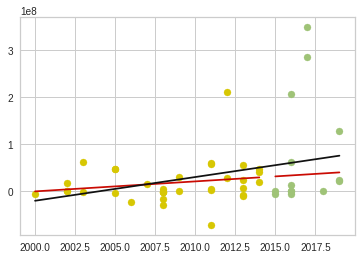

Mean Absolute Error: 80072293.9640053
Mean Squared Error: 1.4858413301737004e+16
Root Mean Squared Error: 121895091.37671214
----------
Genre Cluster #:  1


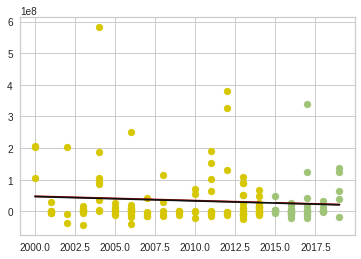

Mean Absolute Error: 37157035.4530112
Mean Squared Error: 3678504364030026.0
Root Mean Squared Error: 60650674.88519832
----------
Genre Cluster #:  2


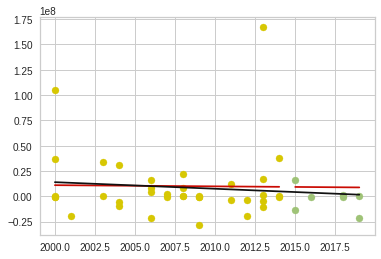

Mean Absolute Error: 13758953.883043298
Mean Squared Error: 260519094604361.97
Root Mean Squared Error: 16140603.910769943
----------
Genre Cluster #:  3


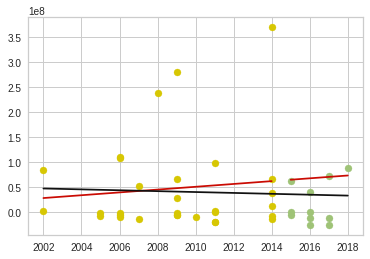

Mean Absolute Error: 54637858.00687192
Mean Squared Error: 4144931218429267.0
Root Mean Squared Error: 64381140.23865426
----------
Genre Cluster #:  4


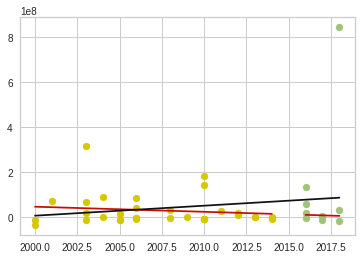

Mean Absolute Error: 122368370.18429343
Mean Squared Error: 7.972340201760347e+16
Root Mean Squared Error: 282353328.327476
----------
Genre Cluster #:  5


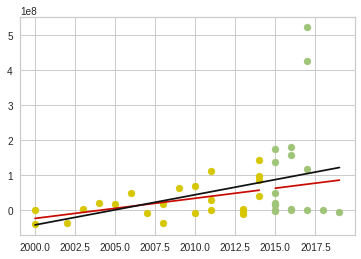

Mean Absolute Error: 107889305.84465869
Mean Squared Error: 2.3818670984759396e+16
Root Mean Squared Error: 154332987.3512445
----------
Genre Cluster #:  6


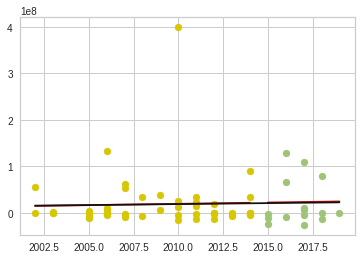

Mean Absolute Error: 41458813.41245396
Mean Squared Error: 2313654512062340.5
Root Mean Squared Error: 48100462.70112524
----------
Genre Cluster #:  7


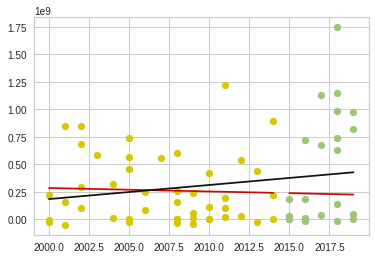

Mean Absolute Error: 413786220.3685867
Mean Squared Error: 2.8690716579656525e+17
Root Mean Squared Error: 535637158.715268
----------
Genre Cluster #:  8


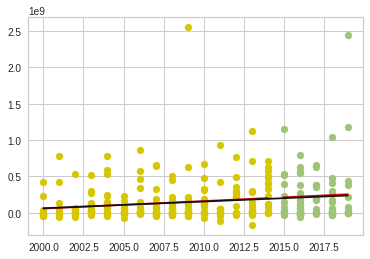

Mean Absolute Error: 250027280.2656722
Mean Squared Error: 1.3194274276341173e+17
Root Mean Squared Error: 363239236.26641953
----------
Genre Cluster #:  9


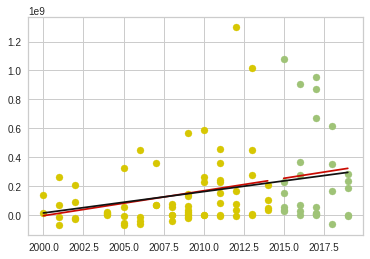

Mean Absolute Error: 269628524.0379242
Mean Squared Error: 1.1083866435479627e+17
Root Mean Squared Error: 332924412.374335
----------
Genre Cluster #:  10


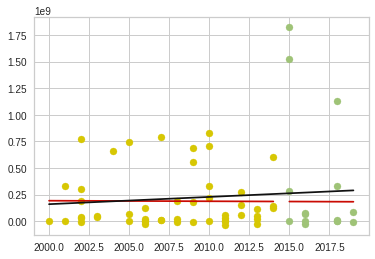

Mean Absolute Error: 386329495.6837979
Mean Squared Error: 3.787870081920608e+17
Root Mean Squared Error: 615456747.6208712
----------
Genre Cluster #:  11


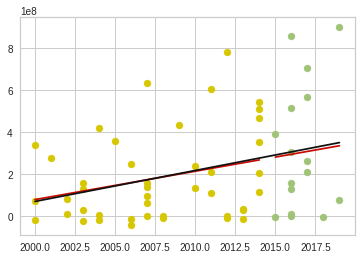

Mean Absolute Error: 250712205.6489575
Mean Squared Error: 8.735986387468768e+16
Root Mean Squared Error: 295567020.952419
----------
Genre Cluster #:  12


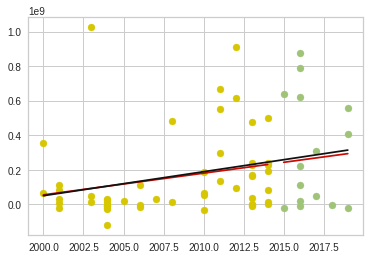

Mean Absolute Error: 272547454.2695859
Mean Squared Error: 9.914835577215555e+16
Root Mean Squared Error: 314878318.99347335
----------
Genre Cluster #:  13


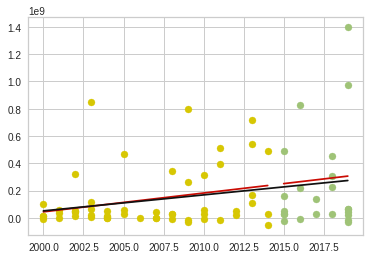

Mean Absolute Error: 281679158.4419972
Mean Squared Error: 1.2930047502343115e+17
Root Mean Squared Error: 359583752.44639623
----------
Genre Cluster #:  14


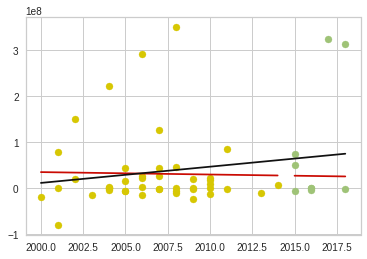

Mean Absolute Error: 88549046.62126644
Mean Squared Error: 1.977126830347034e+16
Root Mean Squared Error: 140610342.09285724
----------
Genre Cluster #:  15


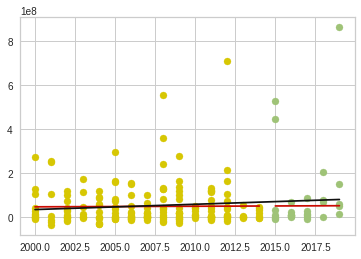

Mean Absolute Error: 95767420.19418697
Mean Squared Error: 3.737240213708877e+16
Root Mean Squared Error: 193319430.31441194
----------
Genre Cluster #:  16


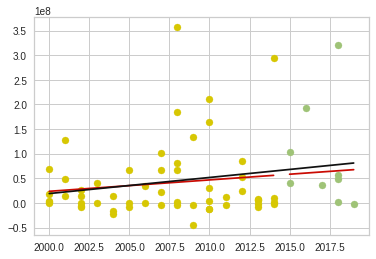

Mean Absolute Error: 70585264.27249421
Mean Squared Error: 1.054795196392852e+16
Root Mean Squared Error: 102703222.7533709
----------
Genre Cluster #:  17


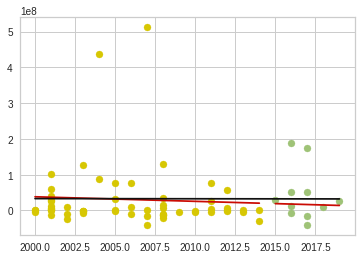

Mean Absolute Error: 49468715.66583209
Mean Squared Error: 5611678383059916.0
Root Mean Squared Error: 74911136.57567823
----------
Genre Cluster #:  18


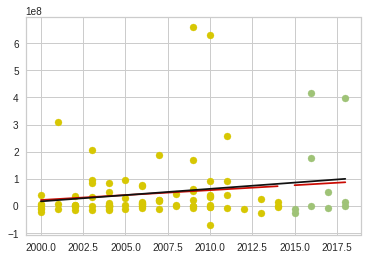

Mean Absolute Error: 129608456.31678906
Mean Squared Error: 2.6653613524860948e+16
Root Mean Squared Error: 163259344.37226233
----------
Genre Cluster #:  19


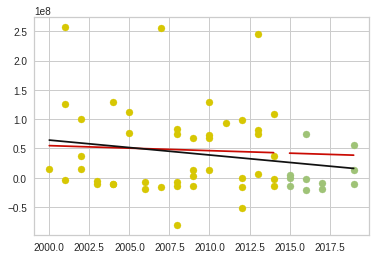

Mean Absolute Error: 43160342.95995155
Mean Squared Error: 2049156700057318.5
Root Mean Squared Error: 45267612.04279853
----------
Genre Cluster #:  20


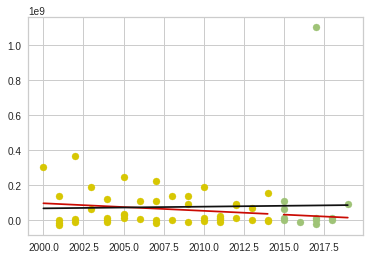

Mean Absolute Error: 121185607.23918884
Mean Squared Error: 9.908233673979424e+16
Root Mean Squared Error: 314773468.9261378
----------
Genre Cluster #:  21


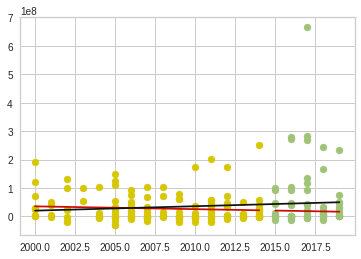

Mean Absolute Error: 59018026.77309667
Mean Squared Error: 1.3542436603104294e+16
Root Mean Squared Error: 116371975.16199635
----------
Genre Cluster #:  22


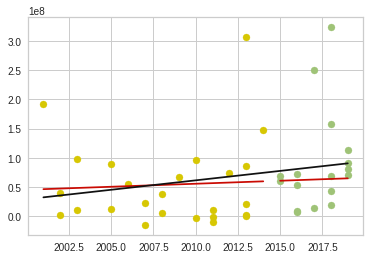

Mean Absolute Error: 52477290.298334315
Mean Squared Error: 7404443370197355.0
Root Mean Squared Error: 86049075.3593399
----------
Genre Cluster #:  23


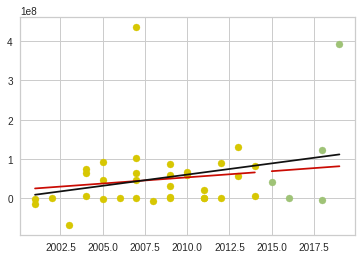

Mean Absolute Error: 107377667.46008606
Mean Squared Error: 2.234746419562942e+16
Root Mean Squared Error: 149490682.63818124
----------
Genre Cluster #:  24


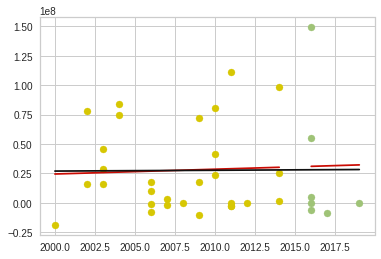

Mean Absolute Error: 44042689.37966931
Mean Squared Error: 2881421900568058.5
Root Mean Squared Error: 53678877.6016047
----------
Genre Cluster #:  25


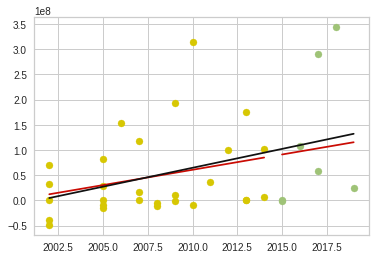

Mean Absolute Error: 107436881.3017837
Mean Squared Error: 1.6719870496078782e+16
Root Mean Squared Error: 129305338.23504265
----------
Genre Cluster #:  26


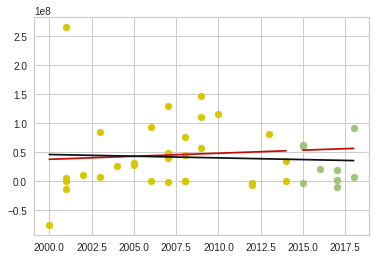

Mean Absolute Error: 38424869.941822685
Mean Squared Error: 1842562170887388.5
Root Mean Squared Error: 42925076.24789254
----------
Genre Cluster #:  27


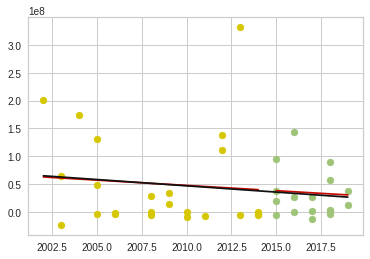

Mean Absolute Error: 33278262.039619476
Mean Squared Error: 1721850773188582.5
Root Mean Squared Error: 41495189.759640604
----------
Genre Cluster #:  28


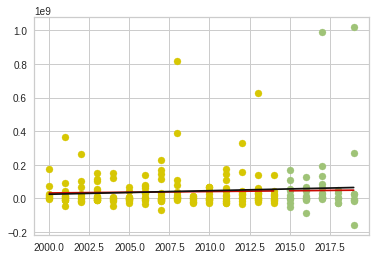

Mean Absolute Error: 91287566.93920515
Mean Squared Error: 4.152932002744698e+16
Root Mean Squared Error: 203787438.34556383
----------
Genre Cluster #:  29


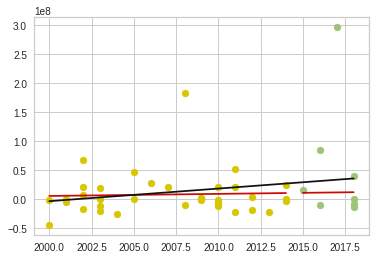

Mean Absolute Error: 58736456.919523865
Mean Squared Error: 1.114292174607758e+16
Root Mean Squared Error: 105560038.58505158
----------
Genre Cluster #:  30


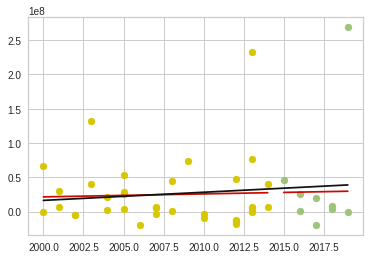

Mean Absolute Error: 46961621.11173504
Mean Squared Error: 6973782842468057.0
Root Mean Squared Error: 83509178.19298701
----------
Genre Cluster #:  31


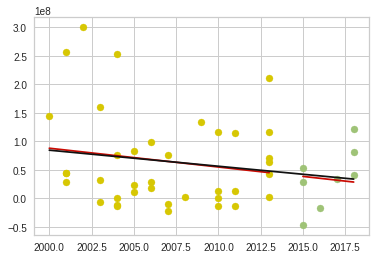

Mean Absolute Error: 40215282.968290925
Mean Squared Error: 2721900994373635.0
Root Mean Squared Error: 52171841.01000879
----------
Genre Cluster #:  32


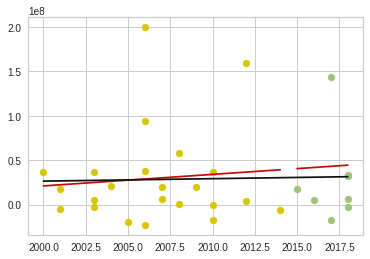

Mean Absolute Error: 41017279.84606308
Mean Squared Error: 2439262792834251.0
Root Mean Squared Error: 49388893.415769614
----------
Genre Cluster #:  33


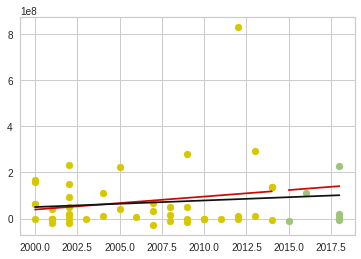

Mean Absolute Error: 106749307.58737342
Mean Squared Error: 1.3316150126973464e+16
Root Mean Squared Error: 115395624.38400108
----------
Genre Cluster #:  34


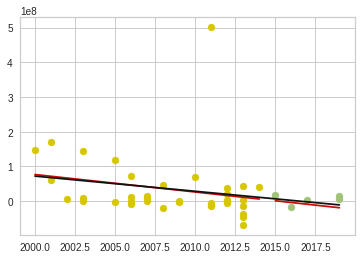

Mean Absolute Error: 19637604.06453667
Mean Squared Error: 455527745182786.8
Root Mean Squared Error: 21343095.9605861
----------
Genre Cluster #:  35


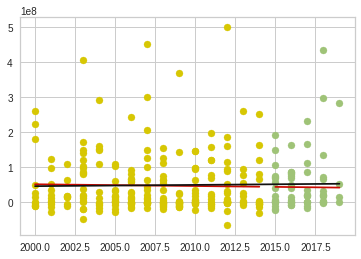

Mean Absolute Error: 56534802.45816888
Mean Squared Error: 7217193958910810.0
Root Mean Squared Error: 84954069.70187367
----------
Genre Cluster #:  36


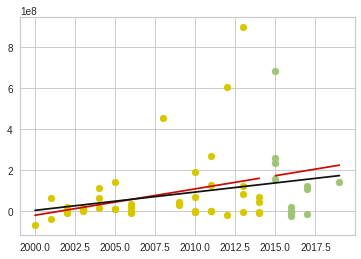

Mean Absolute Error: 160250441.81594467
Mean Squared Error: 3.992557394820478e+16
Root Mean Squared Error: 199813848.23931694
----------
Genre Cluster #:  37


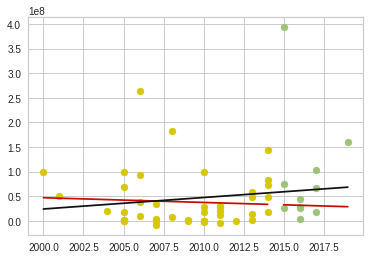

Mean Absolute Error: 64839414.85864919
Mean Squared Error: 1.4261984728985286e+16
Root Mean Squared Error: 119423551.81866467
----------
Genre Cluster #:  38


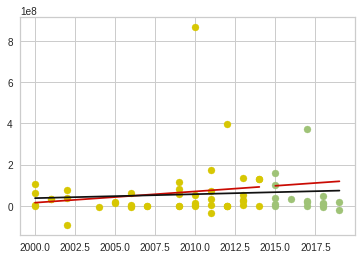

Mean Absolute Error: 97943024.41592717
Mean Squared Error: 1.2339548764325844e+16
Root Mean Squared Error: 111083521.56969927
----------
Genre Cluster #:  39


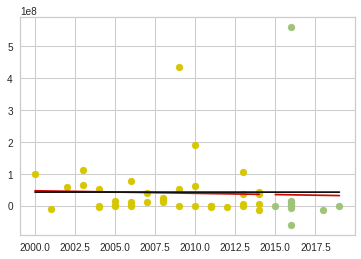

Mean Absolute Error: 87932148.29769464
Mean Squared Error: 2.938089462204962e+16
Root Mean Squared Error: 171408560.52732494
----------
Genre Cluster #:  40


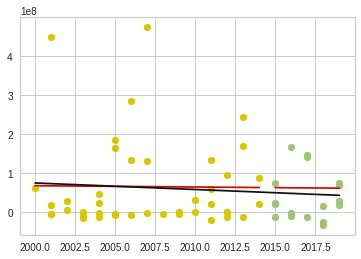

Mean Absolute Error: 57067451.49421419
Mean Squared Error: 4123701090374844.5
Root Mean Squared Error: 64216050.09944823
----------
Genre Cluster #:  41


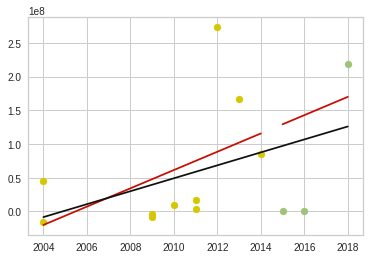

Mean Absolute Error: 106684899.60326512
Mean Squared Error: 1.3089976674262978e+16
Root Mean Squared Error: 114411435.94179289
----------
Genre Cluster #:  42


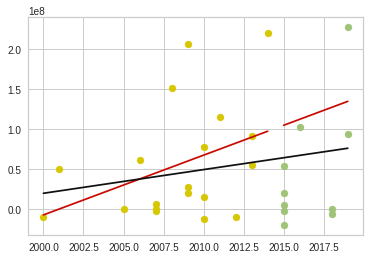

Mean Absolute Error: 86976348.06335124
Mean Squared Error: 9078657128946540.0
Root Mean Squared Error: 95281987.43176246
----------
Genre Cluster #:  43


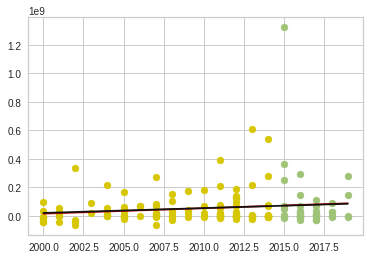

Mean Absolute Error: 110173762.47965296
Mean Squared Error: 4.77531055030647e+16
Root Mean Squared Error: 218524839.55620402
----------
Genre Cluster #:  44


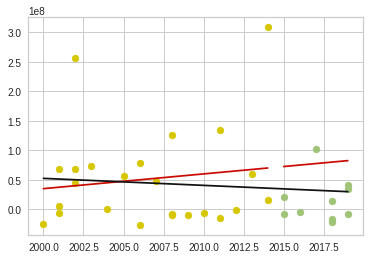

Mean Absolute Error: 67779179.88715553
Mean Squared Error: 5207501287453939.0
Root Mean Squared Error: 72163018.83550839
----------
Genre Cluster #:  45


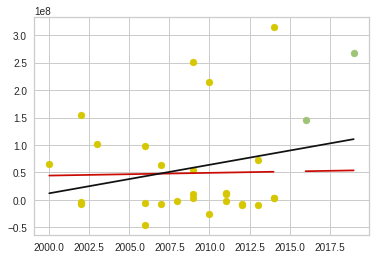

Mean Absolute Error: 153925339.54711556
Mean Squared Error: 2.7340433232039516e+16
Root Mean Squared Error: 165349427.67375857
----------
Genre Cluster #:  46


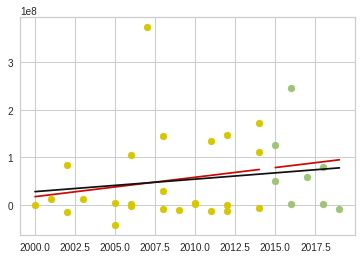

Mean Absolute Error: 68444305.47250605
Mean Squared Error: 6860198597540559.0
Root Mean Squared Error: 82826315.85154901
----------
Genre Cluster #:  47


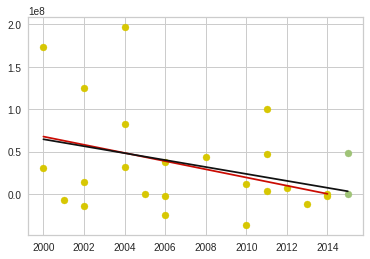

Mean Absolute Error: 28829214.005853653
Mean Squared Error: 1418766872431333.5
Root Mean Squared Error: 37666521.90515251
----------


In [12]:
TMDB_updated_old=TMDB_updated[TMDB_updated['year']< 2015]

print(TMDB_updated_old.info())

TMDB_updated_new=TMDB_updated[TMDB_updated['year']>= 2015]


print(TMDB_updated["generalcluster"].max())
for i in range (TMDB_updated["generalcluster"].max()):

    TMDB_Subset_old=TMDB_updated_old[TMDB_updated_old['generalcluster']== i ]
    TMDB_Subset_new=TMDB_updated_new[TMDB_updated_new['generalcluster']== i ]
    TMDB_updated_subset=TMDB_updated[TMDB_updated['generalcluster']== i ]

    """  
print(TMDB_updated["genre_cluster"].max())
for i in range (TMDB_updated["genre_cluster"].max()+1):

    TMDB_Subset_old=TMDB_updated_old[TMDB_updated_old['genre_cluster']== i ]
    TMDB_Subset_new=TMDB_updated_new[TMDB_updated_new['genre_cluster']== i ]    
    
    """     
    
    X_train=TMDB_Subset_old['year']
    y_train=TMDB_Subset_old['profit'] 
    
    X_train_full=TMDB_updated_subset['year']
    y_train_full=TMDB_updated_subset['profit'] 
    
    
    X_test=TMDB_Subset_new['year']
    y_test=TMDB_Subset_new['profit']
    
    
    

    #X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.75)

    #below reshaping code required only when number of feature = 1 
    X_train=X_train.values.reshape((-1,1))
    y_train=y_train.values.reshape((-1,1))
    X_train_full=X_train_full.values.reshape((-1,1))
    y_train_full=y_train_full.values.reshape((-1,1))
    
    
    X_test=X_test.values.reshape((-1,1))
    y_test=y_test.values.reshape((-1,1))
    
    
    
    #regold=LinearRegression().fit(X_train,y_train)
    regtrain = LinearRegression().fit(X_train,y_train)
    regactual = LinearRegression().fit(X_train_full,y_train_full)
    
    
    #C = 100
    #gamma = 10
    #kernel = 'rbf'
    #reg = SVC(C=C,gamma=gamma,kernel=kernel)
    #regold.fit(X_train,y_train)   
    regtrain.fit(X_train,y_train)
    regactual.fit(X_train_full,y_train_full)
    y_old= regtrain.predict(X_train)  #Lin reg of older data
    y_pred = regtrain.predict(X_test) #predicted Lin reg of newer data, based on old data
    y_regactual=regactual.predict(X_train_full) #actual Lin reg of newer data
    
    """
    polynomial_features= PolynomialFeatures(degree=2)
    x_poly = polynomial_features.fit_transform(X_train)
    model = LinearRegression()
    model.fit(x_poly, y_train)
    y_poly_pred = model.predict(x_poly)
    """
    #polyfit = np.poly1d(np.polyfit(X_test,y_test,2))
    
    
    #final_score = reg.score(y_pred, y_test)
    print("Genre Cluster #: ",i)
   
    
    plt.scatter(X_test, y_test, color ='g') 
    plt.scatter(X_train, y_train, color ='y')
    
    #Lin Regression prediction
    plt.plot(X_test, y_pred, color ='r') 
    plt.plot(X_train, y_old, color ='r') 
    plt.plot(X_train_full, y_regactual, color ='k') 
    """
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(X_train,y_poly_pred), key=sort_axis)
    X_train, y_poly_pred = zip(*sorted_zip)
    
    
    plt.plot(X_train, y_poly_pred, color='b')
    #plt.plot(X_train, polyfit, color='p')
    """
    
    plt.show()
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('----------')
   
